# Chapter 7: Data Cleaning and Preparation

## 7.1 Handling Missing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# "Sentinel" value (null).
float_data = pd.Series([1.2, -3.5, np.nan, 0])
float_data.isna()

0    False
1    False
2     True
3    False
dtype: bool

In [3]:
# None is trated as Nan.
string_data = pd.Series(["hello", np.nan, None, "avocado"])
string_data

0      hello
1        NaN
2       None
3    avocado
dtype: object

In [4]:
string_data.isna()

0    False
1     True
2     True
3    False
dtype: bool

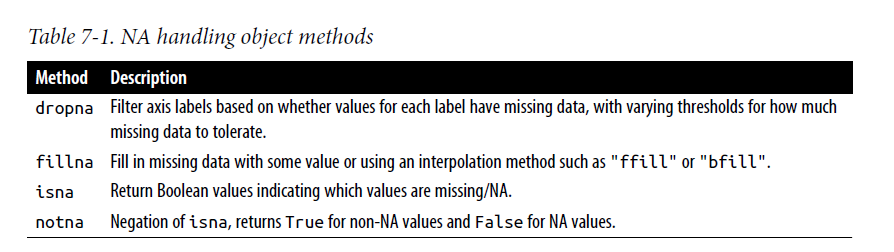

In [5]:
# Dropping na values.
string_data.dropna()

0      hello
3    avocado
dtype: object

In [6]:
string_data[string_data.notna()]

0      hello
3    avocado
dtype: object

In [7]:
# By default, .dropna() drops any row containing a missing value.
data = pd.DataFrame([[1., 6.5, 3.], [1., np.nan, np.nan], [np.nan, np.nan, np.nan], [np.nan, 6.5, 3.]])

In [8]:
data

0    1    2
0  1.0  6.5  3.0
1  1.0  NaN  NaN
2  NaN  NaN  NaN
3  NaN  6.5  3.0

In [9]:
data.dropna()

0    1    2
0  1.0  6.5  3.0

In [10]:
data.dropna(how="all")

0    1    2
0  1.0  6.5  3.0
1  1.0  NaN  NaN
3  NaN  6.5  3.0

In [11]:
data[4] = np.nan

In [12]:
data

0    1    2   4
0  1.0  6.5  3.0 NaN
1  1.0  NaN  NaN NaN
2  NaN  NaN  NaN NaN
3  NaN  6.5  3.0 NaN

In [13]:
data.dropna(axis="columns", how="all")

0    1    2
0  1.0  6.5  3.0
1  1.0  NaN  NaN
2  NaN  NaN  NaN
3  NaN  6.5  3.0

In [14]:
# Can also specify the threshold for at most a certain number of missing observations.
df = pd.DataFrame(np.random.standard_normal((7,3)))
df.iloc[:4,1] = np.nan
df.iloc[:2,2] = np.nan
df

0         1         2
0 -0.639342       NaN       NaN
1 -1.023367       NaN       NaN
2 -0.323281       NaN  0.230127
3  1.858533       NaN -1.845854
4 -0.908012 -1.079294 -0.776989
5  0.322226 -0.822858  0.518092
6  2.149883  0.845030 -0.474340

In [15]:
df.dropna()

0         1         2
4 -0.908012 -1.079294 -0.776989
5  0.322226 -0.822858  0.518092
6  2.149883  0.845030 -0.474340

In [16]:
df.dropna(thresh=2)

0         1         2
2 -0.323281       NaN  0.230127
3  1.858533       NaN -1.845854
4 -0.908012 -1.079294 -0.776989
5  0.322226 -0.822858  0.518092
6  2.149883  0.845030 -0.474340

In [17]:
# Filling in missing data.
df.fillna(0)

0         1         2
0 -0.639342  0.000000  0.000000
1 -1.023367  0.000000  0.000000
2 -0.323281  0.000000  0.230127
3  1.858533  0.000000 -1.845854
4 -0.908012 -1.079294 -0.776989
5  0.322226 -0.822858  0.518092
6  2.149883  0.845030 -0.474340

In [18]:
# Calling fillna with a dictionary to use different fill value for each column.
df.fillna({1: 0.5, 2: 0})

0         1         2
0 -0.639342  0.500000  0.000000
1 -1.023367  0.500000  0.000000
2 -0.323281  0.500000  0.230127
3  1.858533  0.500000 -1.845854
4 -0.908012 -1.079294 -0.776989
5  0.322226 -0.822858  0.518092
6  2.149883  0.845030 -0.474340

In [19]:
# Can also forward fill
df = pd.DataFrame(np.random.standard_normal((6,3)))
df.iloc[2:, 1] = np.nan
df.iloc[4:, 2] = np.nan
df

0         1         2
0 -0.182529 -0.384551 -0.306588
1  0.213197 -0.718997 -0.101219
2 -0.563504       NaN  0.071140
3 -0.567677       NaN -0.763108
4  1.032333       NaN       NaN
5 -1.164582       NaN       NaN

In [20]:
df.ffill(limit=2)

0         1         2
0 -0.182529 -0.384551 -0.306588
1  0.213197 -0.718997 -0.101219
2 -0.563504 -0.718997  0.071140
3 -0.567677 -0.718997 -0.763108
4  1.032333       NaN -0.763108
5 -1.164582       NaN -0.763108

In [21]:
df = pd.DataFrame(np.random.standard_normal((7,3)))
df.iloc[:4,1] = np.nan
df.iloc[:2,2] = np.nan
df

0         1         2
0 -0.682219       NaN       NaN
1 -1.995290       NaN       NaN
2  1.933339       NaN -0.055387
3 -0.560853       NaN  2.598846
4 -2.545304 -0.401416 -1.155645
5 -0.522912 -0.375827 -0.663501
6 -0.578231 -0.445286 -0.899885

In [22]:
df.bfill()

0         1         2
0 -0.682219 -0.401416 -0.055387
1 -1.995290 -0.401416 -0.055387
2  1.933339 -0.401416 -0.055387
3 -0.560853 -0.401416  2.598846
4 -2.545304 -0.401416 -1.155645
5 -0.522912 -0.375827 -0.663501
6 -0.578231 -0.445286 -0.899885

In [23]:
df.bfill(limit=2)

0         1         2
0 -0.682219       NaN -0.055387
1 -1.995290       NaN -0.055387
2  1.933339 -0.401416 -0.055387
3 -0.560853 -0.401416  2.598846
4 -2.545304 -0.401416 -1.155645
5 -0.522912 -0.375827 -0.663501
6 -0.578231 -0.445286 -0.899885

In [24]:
# Can also fill the missing values with mean, median etc.
data = pd.Series([1., np.nan, 3.5, np.nan, 7])
data.fillna(data.mean())

0    1.000000
1    3.833333
2    3.500000
3    3.833333
4    7.000000
dtype: float64

### *Method* is depreciated now.
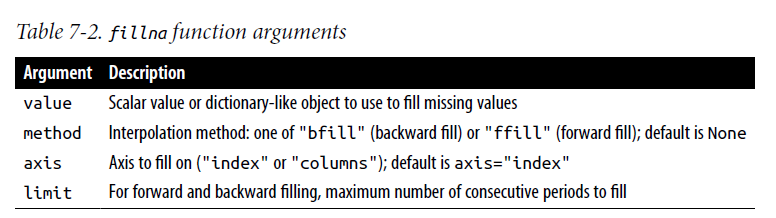

## 7.2 Data Transformation

### Filtering, cleaning, and other transofrmations are important operations as well.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
data = pd.DataFrame({"k1": ["one", "two"] * 3 + ["two"],
                     "k2": [1, 1, 2, 3, 3, 4, 4]})

In [27]:
data

k1  k2
0  one   1
1  two   1
2  one   2
3  two   3
4  one   3
5  two   4
6  two   4

In [28]:
# Duplicate: its column values are exactly equal to those in an earlier row.
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [29]:
data.drop_duplicates()

k1  k2
0  one   1
1  two   1
2  one   2
3  two   3
4  one   3
5  two   4

In [30]:
data["v1"] = range(7)

In [31]:
data.drop_duplicates(subset=["k1"])

k1  k2  v1
0  one   1   0
1  two   1   1

### Function or Mapping

In [32]:
data = pd.DataFrame({"food": ["bacon", "pulled pork", "bacon",
                     "pastrami", "corned beef", "bacon",
                     "pastrami", "honey ham", "nova lox"],
                     "ounces": [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

food  ounces
0        bacon     4.0
1  pulled pork     3.0
2        bacon    12.0
3     pastrami     6.0
4  corned beef     7.5
5        bacon     8.0
6     pastrami     3.0
7    honey ham     5.0
8     nova lox     6.0

In [33]:
meat_to_animal = {
"bacon": "pig",
"pulled pork": "pig",
"pastrami": "cow",
"corned beef": "cow",
"honey ham": "pig",
"nova lox": "salmon"
}

In [34]:
data["animal"] = data["food"].map(meat_to_animal)
data

food  ounces  animal
0        bacon     4.0     pig
1  pulled pork     3.0     pig
2        bacon    12.0     pig
3     pastrami     6.0     cow
4  corned beef     7.5     cow
5        bacon     8.0     pig
6     pastrami     3.0     cow
7    honey ham     5.0     pig
8     nova lox     6.0  salmon

In [35]:
# Can also do the same thing with a function.
def get_animal(x):
    return meat_to_animal[x]

data["food"].map(get_animal)

0       pig
1       pig
2       pig
3       cow
4       cow
5       pig
6       cow
7       pig
8    salmon
Name: food, dtype: object

### Replacing values

In [36]:
data = pd.Series([1., -999, 2., -999., -1000., 3.])
data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

In [37]:
# The -999 might be sentinel values for missing data. Replace with np.nan.
data.replace(-999, np.nan)

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

In [38]:
# Replace multiple values at once.
data.replace([-999, -1000], np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

In [39]:
# Use a different replacement for each value, pass a list of substitutes.
data.replace([-999, -1000], [np.nan, 0])

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

In [40]:
data.replace({-999: np.nan, -1000: 0})

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

### Discretization and binning

In [41]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]
bins = [18, 25, 35, 60, 100]
age_categories = pd.cut(ages, bins)

In [42]:
age_categories

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64, right]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [43]:
data = pd.DataFrame(np.random.standard_normal((1000, 4)))
data.describe()

0            1            2            3
count  1000.000000  1000.000000  1000.000000  1000.000000
mean      0.007324     0.026877    -0.008680     0.095900
std       1.043183     0.997079     1.017972     1.011513
min      -4.095018    -3.139267    -2.813091    -3.373931
25%      -0.666720    -0.655890    -0.689909    -0.598756
50%       0.007112     0.003738    -0.007107     0.094920
75%       0.686705     0.731839     0.664300     0.793289
max       3.983307     3.153140     3.282137     3.114589

In [44]:
data

0         1         2         3
0    1.602859 -1.222557 -0.173990 -2.083283
1    2.113914 -0.811241  0.116943 -0.196618
2   -0.060772 -0.239377 -0.549832  1.338618
3    0.584281 -0.550746  0.951643 -0.378449
4   -2.306011 -1.493589  0.888686 -0.660551
..        ...       ...       ...       ...
995  1.938034  1.987035  1.578014  0.162683
996 -0.470936 -0.862634 -0.403233  1.344989
997  0.018638  0.881630 -2.212829  0.692615
998 -0.857295  0.635827  0.288357  1.609860
999  1.255720 -0.477580 -0.898752  0.797715

[1000 rows x 4 columns]

In [45]:
# Find some outliers. Let's say values greater than abs(3).
data[(data.abs() > 3).any(axis="columns")]

0         1         2         3
24  -0.109040 -1.061474  0.662431 -3.111106
80   3.983307  0.484417  1.217796 -0.458918
95   1.267228 -1.046210  0.650498  3.114589
107 -0.348198  1.534206  0.061327  3.073123
116 -3.323490  0.926594 -0.010397  0.890621
263  1.198577  1.599633 -0.344038  3.040398
273 -4.095018 -1.666591  0.027045  0.048971
285  0.546891  3.153140 -0.391313 -1.676517
364  0.177716 -3.139267 -0.333620  0.791814
492 -0.131113  0.372833 -0.386751 -3.373931
517 -0.654918 -1.317887  3.282137  1.319183
527  0.602001  1.125762  0.365654  3.062616
654  0.929468  0.218352  3.183504 -1.001619
672 -3.116797  0.349679 -0.788510 -1.139533
940  1.117451  1.289501  0.033968 -3.155390
951  1.220159  0.575425 -0.762401  3.014663

In [46]:
# we can use the sign to produce 1 or -1 values based on whether the values in data are positive or negative.
np.sign(data).head()

0    1    2    3
0  1.0 -1.0 -1.0 -1.0
1  1.0 -1.0  1.0 -1.0
2 -1.0 -1.0 -1.0  1.0
3  1.0 -1.0  1.0 -1.0
4 -1.0 -1.0  1.0 -1.0

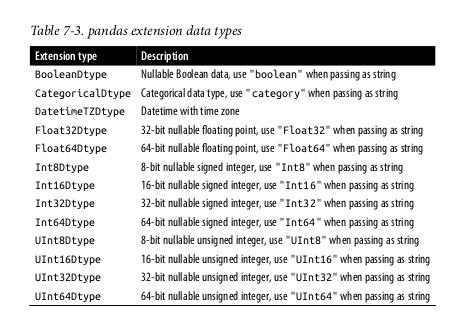

### 7.4 String Manipulation

In [47]:
val = "a,b,   guido"
val.split(",")

['a', 'b', '   guido']

In [48]:
pieces = [x.strip() for x in val.split(",")]
pieces

['a', 'b', 'guido']

In [49]:
"::".join(pieces)

'a::b::guido'

In [50]:
val.index(",")

1

In [51]:
val.index(":")

ValueError: substring not found

In [52]:
val.find(",")

1

In [53]:
val.find(":")

-1

In [54]:
val.count(",")

2

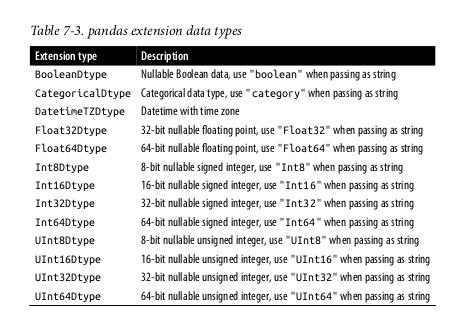

In [55]:
val.replace(",","::")

'a::b::   guido'

In [56]:
val.replace(",","")

'ab   guido'

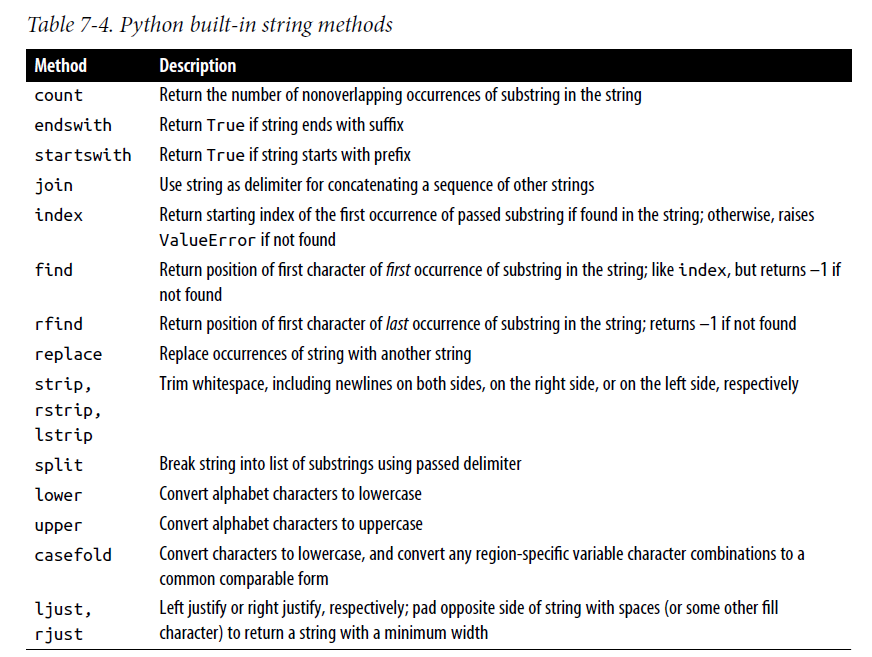

### Regex

In [57]:
import re

In [58]:
text = "foo bar\t baz \tqux"

In [59]:
re.split(r"\s+", text)

['foo', 'bar', 'baz', 'qux']

### Regex is first compiled then it'll apply the split function. If reusing split often then probably best to compile first. Saves CPU cycles :)

In [60]:
regex = re.compile(r"\s+")
regex.split(text)

['foo', 'bar', 'baz', 'qux']

In [61]:
# We can also find all matching patterns to the regex.
regex.findall(text)

[' ', '\t ', ' \t']

In [62]:
text = """Dave dave@google.com
Steve steve@gmail.com
Rob rob@gmail.com
Ryan ryan@yahoo.com"""
pattern = r"[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,4}"

In [63]:
regex = re.compile(pattern, flags=re.IGNORECASE)

In [64]:
regex.findall(text)

['dave@google.com', 'steve@gmail.com', 'rob@gmail.com', 'ryan@yahoo.com']